In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

Parseamos los datos para que sea 28 * 28 en Vez de 3 dimensiones a ser 2

In [4]:
X_train = np.reshape( x_train, (60000,28*28) )
X_test = np.reshape( x_test, (x_test.shape[0],x_test.shape[1]*x_test.shape[2]) )

In [5]:
X_train.shape

(60000, 784)

Dividimos entre la gama de 255

In [6]:
X_train = X_train/255.0
X_test = X_test/255.0

In [7]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Dependiendo si es par lo parseamos a 0 - 1 el booleano el resultado

In [8]:
y_train = (y_train%2 == 0).astype(int)
y_test  = (y_test%2 == 0).astype(int)

In [9]:
y_train

array([0, 1, 1, ..., 0, 1, 1])

In [10]:
dimension_entrada = X_train.shape[1]
dimension_salida = 1
dimension_entrada

784

In [13]:
import pathlib

path=str(pathlib.Path().resolve())+"/"

In [19]:
modelo = Sequential()
modelo.add(Dense(32,activation="relu",input_dim=dimension_entrada))
modelo.add(Dense(1, activation="sigmoid"))
sgd=SGD(learning_rate=0.1)
modelo.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["accuracy","mean_squared_error"])
modelo.summary()

c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\deep-learning\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,153 (98.25 KB)

 Trainable params: 25,153 (98.25 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
epochs = 20
batch_size = 20
checkpoint_cb = keras.callbacks.ModelCheckpoint(path+'model_keras_callbacks.keras',save_best_only=True)
history = modelo.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,callbacks=[checkpoint_cb])

Epoch 1/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 808us/step - accuracy: 0.9157 - loss: 0.2093 - mean_squared_error: 0.0623
Epoch 2/20
 117/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 875us/step - accuracy: 0.9677 - loss: 0.0891 - mean_squared_error: 0.0250

c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\deep-learning\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 790us/step - accuracy: 0.9721 - loss: 0.0817 - mean_squared_error: 0.0221
Epoch 3/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 776us/step - accuracy: 0.9794 - loss: 0.0599 - mean_squared_error: 0.0160
Epoch 4/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 799us/step - accuracy: 0.9807 - loss: 0.0530 - mean_squared_error: 0.0143
Epoch 5/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 811us/step - accuracy: 0.9838 - loss: 0.0464 - mean_squared_error: 0.0123
Epoch 6/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 817us/step - accuracy: 0.9869 - loss: 0.0399 - mean_squared_error: 0.0102
Epoch 7/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 821us/step - accuracy: 0.9876 - loss: 0.0359 - mean_squared_error: 0.0095
Epoch 8/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 796us/step - accuracy: 0.9894 - loss: 0.0311 - mean_squared_error: 0.0082
Epoch 9/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 812us/step - accuracy: 0.9891 - loss: 0.0313 - mean_squared_error: 0.0083
Epoch 10/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 843us/step - 

<Axes: >

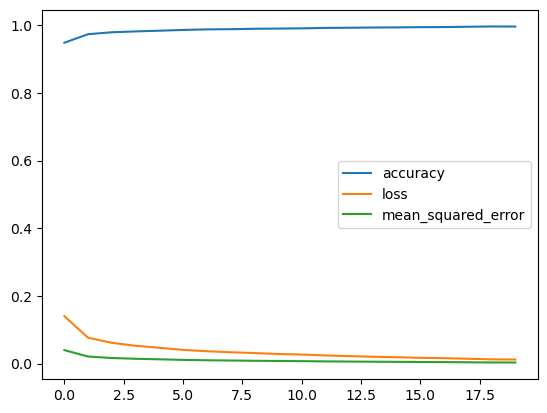

In [21]:
pd.DataFrame(history.history).plot()

In [24]:
X_nueva = X_test[:10]
y_pred = modelo.predict(X_nueva)

print(y_pred,y_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[1.4431589e-08]
 [9.9996257e-01]
 [2.0681480e-03]
 [9.9991268e-01]
 [9.9990517e-01]
 [3.7861580e-05]
 [9.9948370e-01]
 [1.8043229e-02]
 [9.9999994e-01]
 [7.8023266e-05]] [0 1 0 1 1 0 1 0 0 0]
